# Visualizations Practices Using Pokemon datasets

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [82]:
sales_df =pd.read_csv('sales-data.csv')
sales_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


## Bar Charts

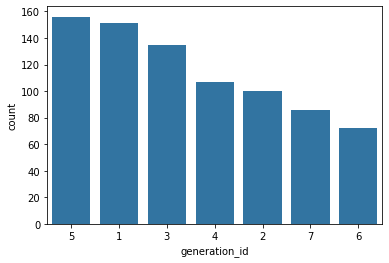

In [24]:
#plot generation_id
order_by_g = df.generation_id.value_counts().index

sns.countplot(data=df, x='generation_id', color=sns.color_palette()[0], order=order_by_g);

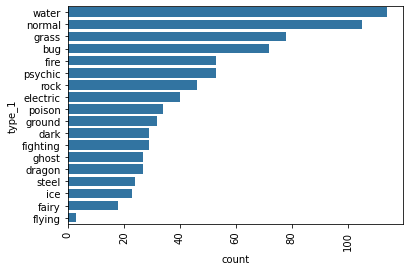

In [31]:
order_p = df.type_1.value_counts().index
sns.countplot(data=df, y='type_1', color=sns.color_palette()[0],order=order_p)
plt.xticks(rotation=90);

In [34]:
#will displaay as table
df.type_1.value_counts()[:5].to_frame()

,type_1
water,114
normal,105
grass,78
bug,72
fire,53


In [36]:
df.head(2)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


In [39]:
df_types = df.melt(id_vars=['id','species'], value_vars=['type_1','type_2'], var_name='type_level', value_name='type')
df_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [41]:
#frequency
type_count = df_types.type.value_counts()
type_count

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [68]:
type_count.shape

(18,)

In [42]:
#type order in decreasing
type_order = type_count.index

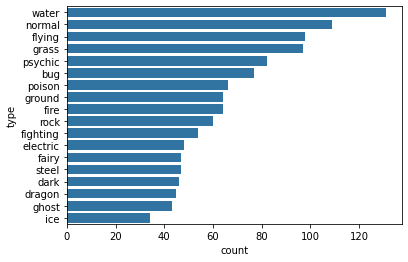

In [45]:
sns.countplot(data=df_types, y='type', color=sns.color_palette()[0], order=type_order);

### proportion plot

In [49]:
#sum of all not null values
#n_pokemon = df_types.type.notnull().sum()
n_pokemon = df_types.type.value_counts().sum()

#highest frequency
max_type_count = type_count[0]

#calculate the length of the longest bar in terms of proportion
max_prop = max_type_count/n_pokemon
print(max_prop)

0.10808580858085809


In [59]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [60]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

### Type 1

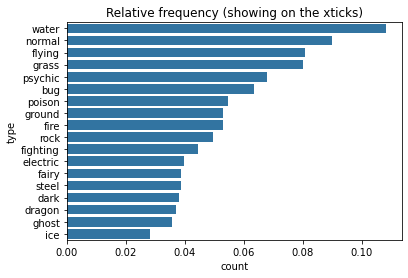

In [67]:
sns.countplot(data=df_types, y='type', color=sns.color_palette()[0], order=type_order);
plt.xticks(tick_props*n_pokemon, tick_names);
plt.title('Relative frequency (showing on the xticks)');

### Type 2

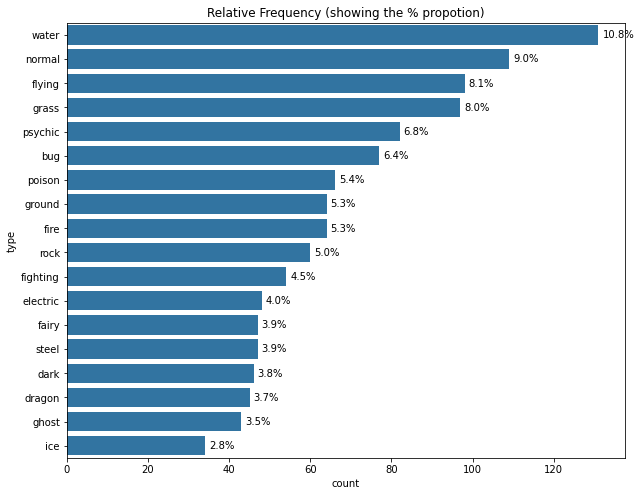

In [81]:
#This requires writing a loop over the tick locations and labels and adding one text element for each bar.
plt.figure(figsize=(10,8))
sns.countplot(data=df_types, y='type', color=sns.color_palette()[0], order=type_order);
plt.title('Relative Frequency (showing the % propotion)');
for i in range(type_count.shape[0]):
    count = type_count[i]
    #convert count into % e.g 109 = 109*100/n_pokemon
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    #print on the bar
    plt.text(count+1,i,pct_string, va='center')

### Type 3

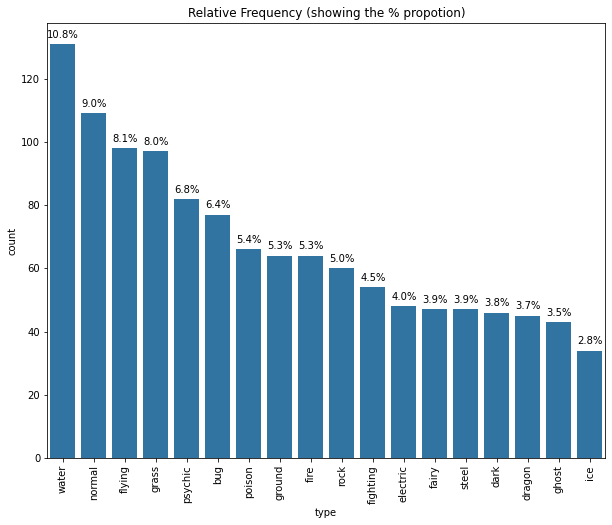

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_types, x='type', color=sns.color_palette()[0], order=type_order);
plt.title('Relative Frequency (showing the % propotion)');
#get the current tick location and labels
locs, labels = plt.xticks(rotation=90)
for loc, label in zip(locs,labels):
    
    # get the text property for the label to get the correct count
    count = type_count[label.get_text()]
    
    #convert count into % e.g 109 = 109*100/n_pokemon
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
 
    #print on the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')

## Using BarChart to plot missing values in a variable

In [83]:
sales_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [89]:
nan_cols = sales_df.columns[sales_df.isna().sum()>0]
nan_sum = sales_df[nan_cols].isna().sum()
nan_sum

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

In [99]:
nan_sum[1]

5269

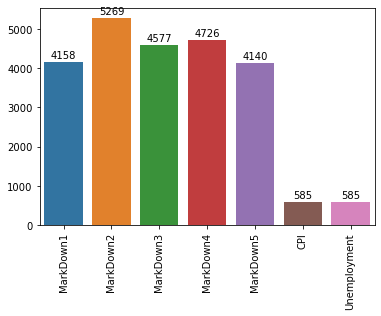

In [105]:
sns.barplot(x=nan_cols, y=nan_sum)
plt.xticks(rotation=90);
for i in range(nan_sum.shape[0]):
    count = nan_sum[i]
    #text inside the bar
    #plt.text(i,count-60,count,ha='center',va='top', color='white')
    #text outside bar
    plt.text(i,count+300,count,ha='center',va='top')